In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ipl_data = pd.read_csv('iplauction2023-Copy1.csv')
ipl_data

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [3]:
ipl_data.shape

(309, 7)

In [4]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [5]:
ipl_data.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

## Data Cleaning

Lets check the status of number of players being 'RETAINED','SOLD' and 'UNSOLD'

<Axes: xlabel='status', ylabel='count'>

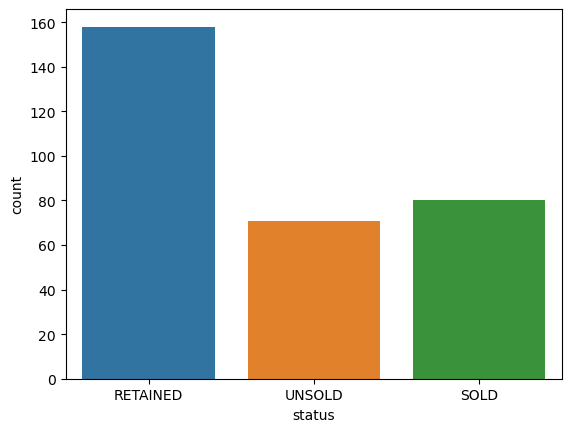

In [20]:
sns.countplot(x='status',data=ipl_data)

And now lets compare the status of these players with the franchise they belong to

<Axes: xlabel='status', ylabel='count'>

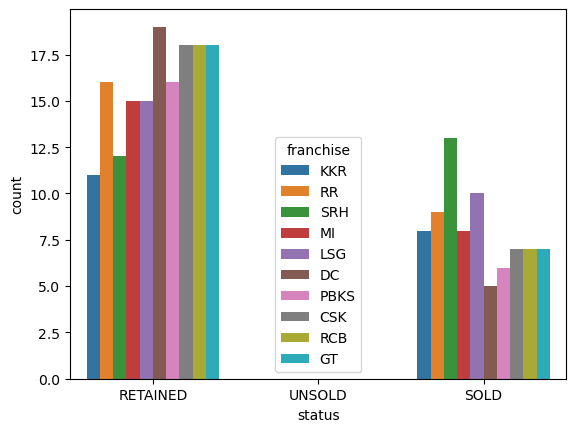

In [21]:
sns.countplot(x='status',data=ipl_data,hue='franchise')

Well it looks like the players that are unsold dont belong to any franchise..
Hence we can go ahead and fill it with "No Franchise"..

In [22]:
ipl_data.head(10)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
6,Prashant Chopra,Allrounder,India,20.0,NaN,NaN,UNSOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD
9,Yudhvir Singh Charak,Allrounder,India,20.0,20.0,LSG,SOLD


In [23]:
ipl_data['franchise'].fillna('No Franchise',inplace=True)
ipl_data

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,No Franchise,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,No Franchise,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [24]:
ipl_data.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                  0
status                     0
dtype: int64

In [27]:
g = ipl_data.groupby('status')

In [29]:
g.count()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise
status,,,,,,
RETAINED,158,158,158,0,158,158
SOLD,80,80,80,80,80,80
UNSOLD,71,71,71,71,0,71


By looking at this table we can say that the players that are retained dont have a 'base price' and the players that are unsold dont have a 'final price'...

This simple table of the dataframe object shows that all retained players don't have a base price, all unsold players don't have a final price and franchise since they havn't been sold. I would go ahead and replace the missing base price and final price values with zero.

In [31]:
ipl_data['base price (in lacs)'].fillna(0,inplace=True)
ipl_data['final price (in lacs)'].fillna(0,inplace=True)
ipl_data.head(20)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,No Franchise,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,No Franchise,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
6,Prashant Chopra,Allrounder,India,20.0,0.0,No Franchise,UNSOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD
9,Yudhvir Singh Charak,Allrounder,India,20.0,20.0,LSG,SOLD


In [32]:
ipl_data.isnull().sum()

name                     0
player style             0
nationality              0
base price (in lacs)     0
final price (in lacs)    0
franchise                0
status                   0
dtype: int64

In [35]:
ipl_data['name'].duplicated().sum()

0

As we can see there is no duplicated data and each player record in the dataset is unique..

Hence we have completed the process of data cleaning by handling all the null values and sorting the data

## Data Analysis

Now lets see the distribution of players in each country..

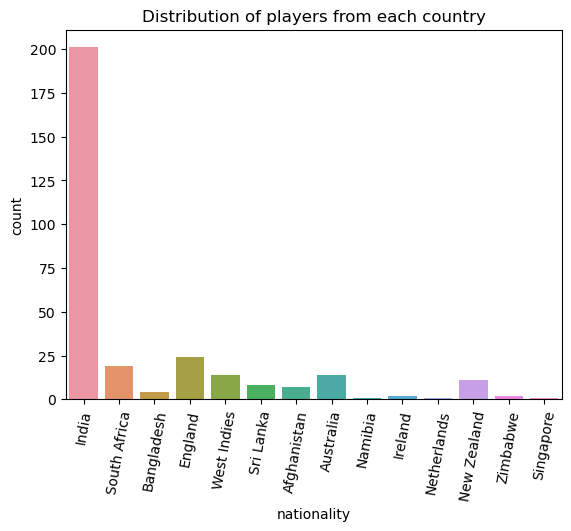

In [43]:
sns.countplot(x='nationality',data=ipl_data)
plt.title("Distribution of players from each country")
plt.xticks(rotation=80);

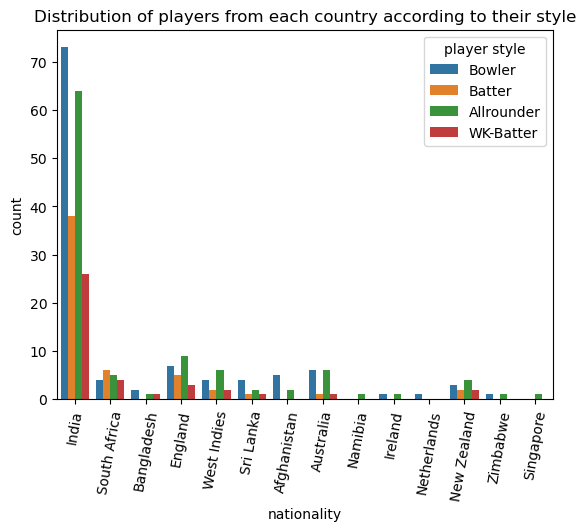

In [46]:
sns.countplot(x='nationality',data=ipl_data,hue='player style')
plt.title("Distribution of players from each country according to their style")
plt.xticks(rotation=80);

From the graphs we can see that most of the players are from India..
Further, in India most players are Bowlers, followed by Allrounders

Lets see the distribution of player status with respect to their style

<Axes: xlabel='status', ylabel='count'>

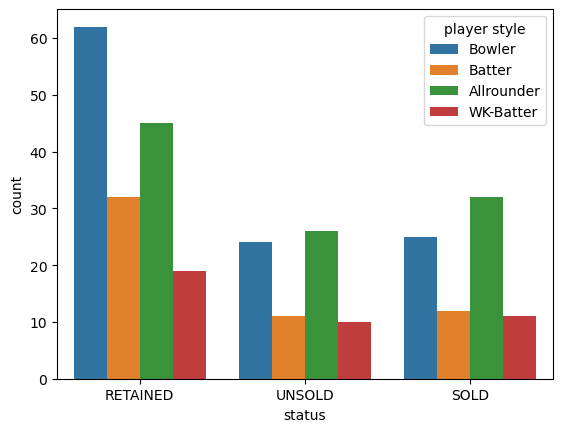

In [47]:
sns.countplot(x='status',hue='player style',data = ipl_data)

The player styles retained the most are the bowlers and then all rounders. Most players already sold this season are all rounders. The unsold players remaining in the market are mostly all rounders. WK-batters are the least likely to be retained. It also has the least about of players with this style.

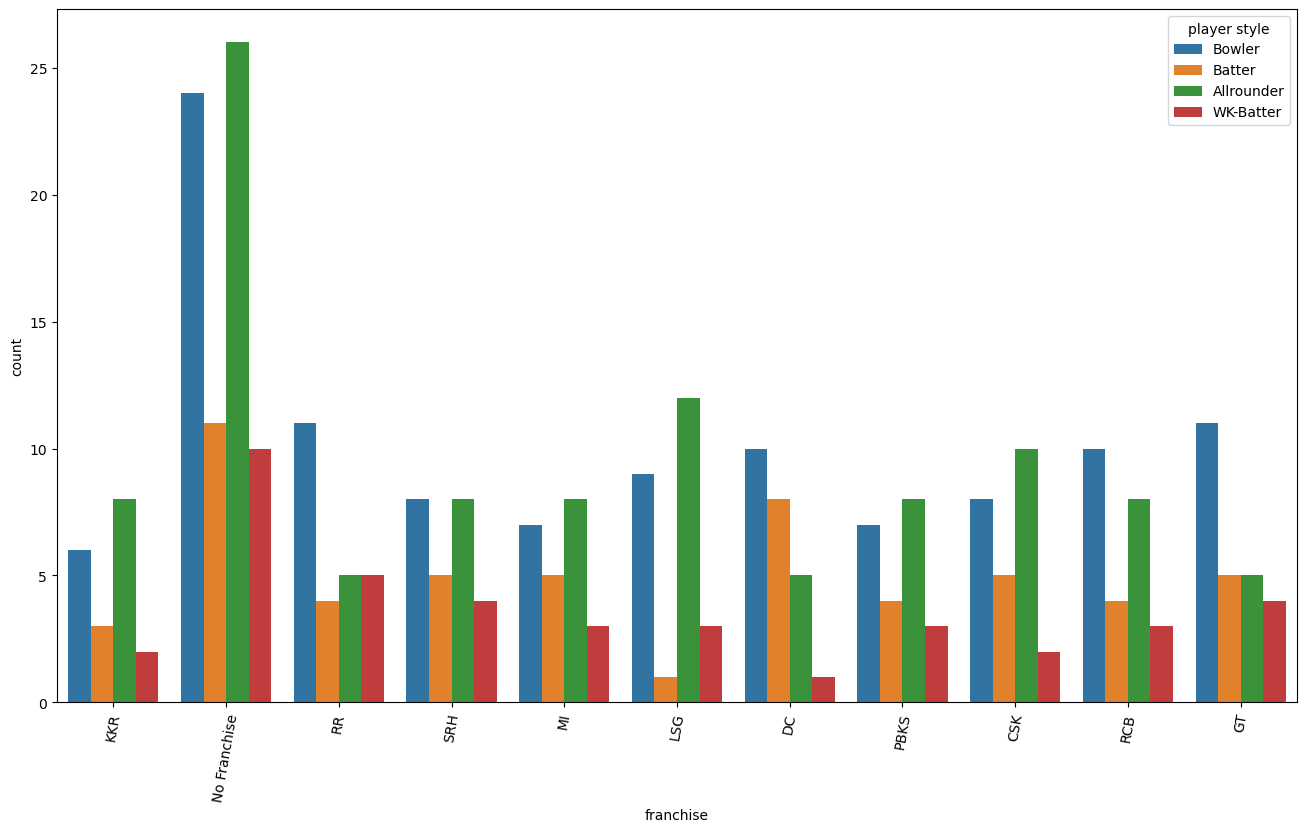

In [62]:
plt.figure(figsize=(16,9))
sns.countplot(x='franchise',hue='player style',data = ipl_data)
plt.xticks(rotation=80);


In [63]:
# Most Bowlers belong to : RR and GT 
# Most Batter belong to : DC
# Most Allrounders belong to : LSG
# Most Wk-Batter belong to : RR

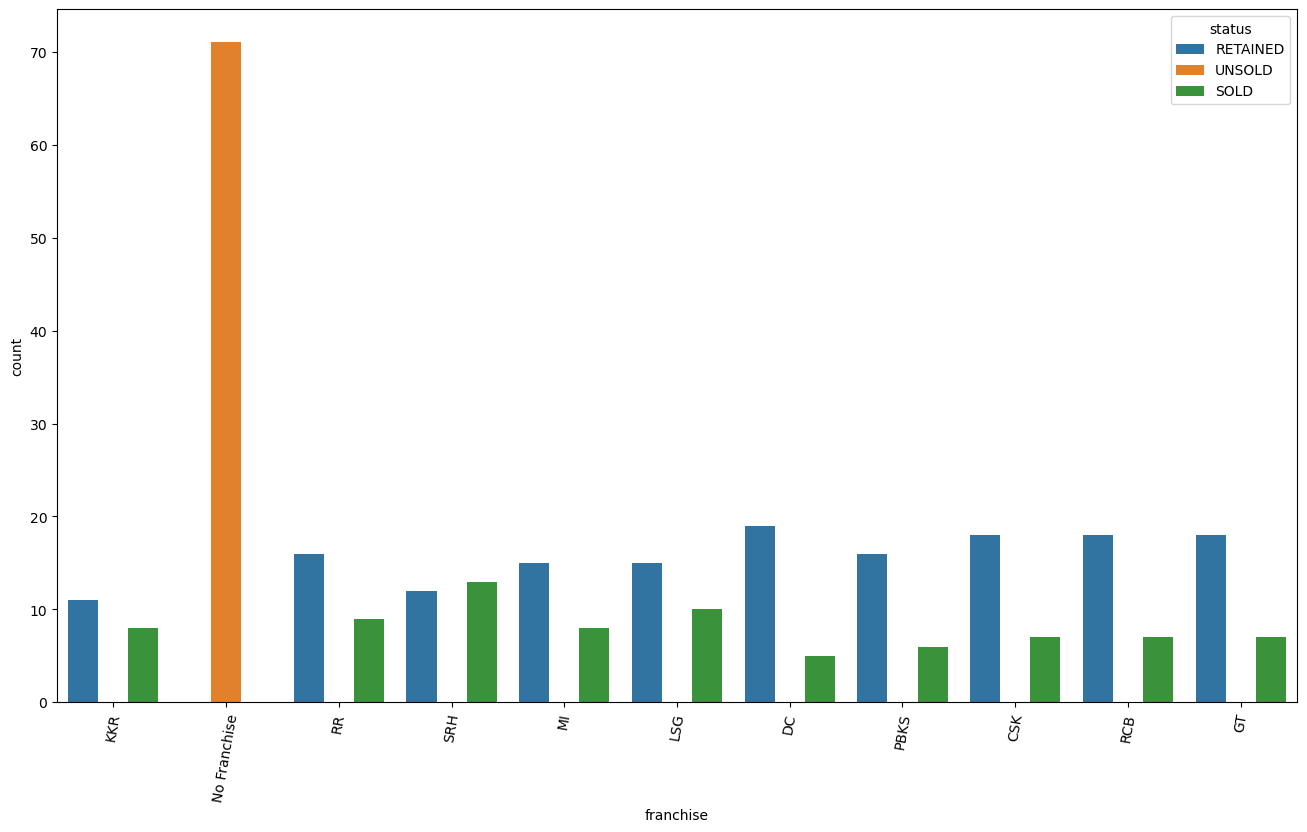

In [64]:
plt.figure(figsize=(16,9))
sns.countplot(x='franchise',hue='status',data = ipl_data)
plt.xticks(rotation=80);


DC, CSK, RCB, GT are the teams which retained the mosty players from the previous season

In [65]:
ipl_data.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,No Franchise,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,No Franchise,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


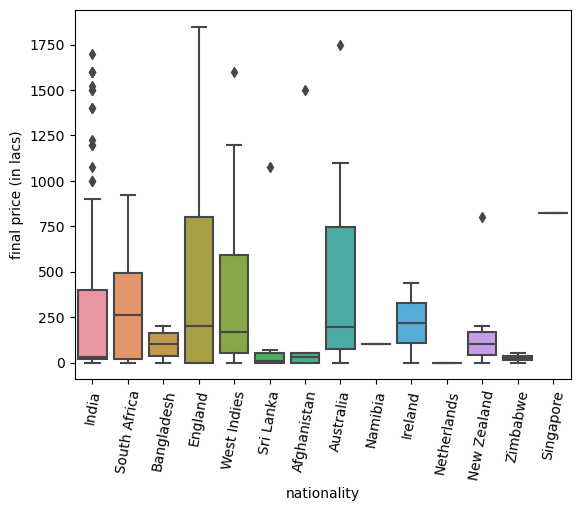

In [71]:
sns.boxplot(data=ipl_data,x='nationality',y='final price (in lacs)')
plt.xticks(rotation=80);

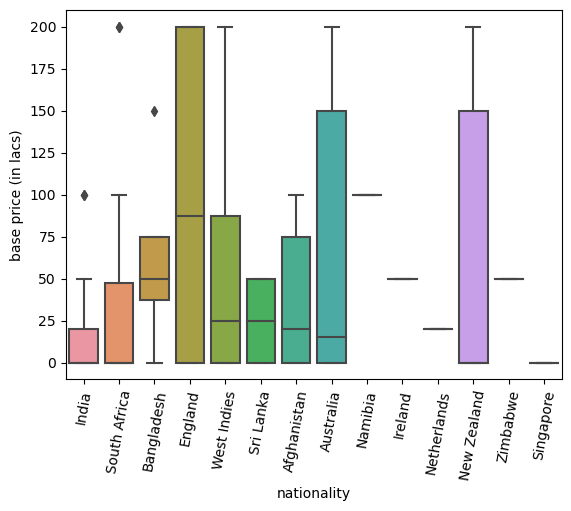

In [72]:
sns.boxplot(data=ipl_data,x='nationality',y='base price (in lacs)')
plt.xticks(rotation=80);

Local players are generally more affordable than international players, both their base price and their final price

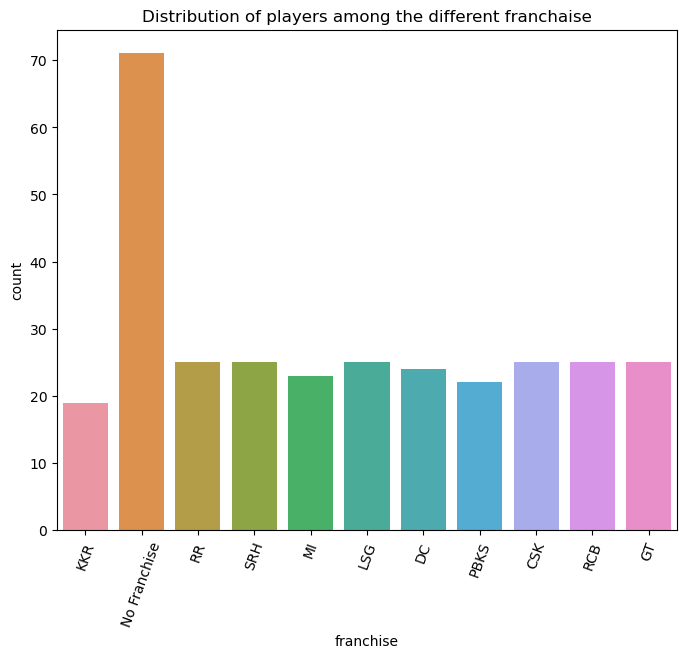

In [74]:
plt.figure(figsize=(8,6.5))
ax = sns.countplot(x="franchise", data=ipl_data)
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.title("Distribution of players among the different franchaise")
plt.xticks(rotation = 70)
plt.show()

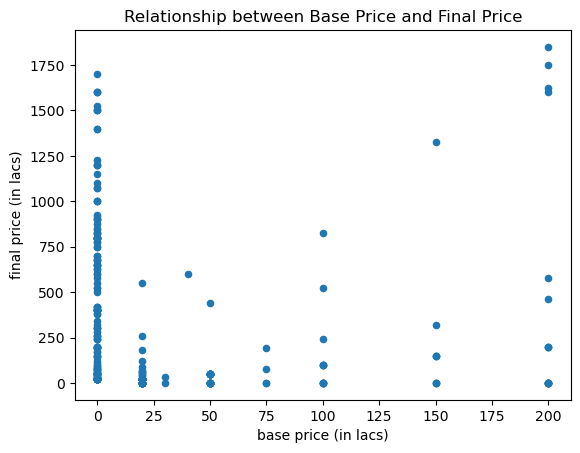

In [80]:
ipl_data.plot(x='base price (in lacs)',y='final price (in lacs)',kind='scatter')
plt.title("Relationship between Base Price and Final Price");

# Conclusion
- Most of the players are from India.. Further, in India most players are Bowlers, followed by Allrounders.
- The player styles retained the most are the bowlers and then all rounders. 
- Most players already sold this season are all rounders. 
- The unsold players remaining in the market are mostly all rounders.
- WK-batters are the least likely to be retained. It also has the least about of players with this style.
- Most Bowlers belong to : RR and GT 
- Most Batter belong to : DC
- Most Allrounders belong to : LSG
- Most Wk-Batter belong to : RR
- DC, CSK, RCB, GT are the teams which retained the mosty players from the previous season
- Local players are generally more affordable than international players, both their base price and their final price
- Most players who start the auction at low prices, end up with low final prices